


About Dataset:  

Food choices and preferences of college students:

This dataset includes information on food choices, nutrition, preferences, childhood favorites, and other information from college students. There are 126 responses from students. Data is raw and uncleaned. Cleaning is in the process and as soon as that is done, additional versions of the data will be posted.


Inspiration:  

How important is nutrition information for today's college kids? Is their taste in food defined by their food preferences when they were children? Are kids of parents who cook more likely to make better food choices than others? Are these kids likely to have a different taste compared to others? There a number of open ended questions included in this dataset such as: What is your favorite comfort food? What is your favorite cuisine? that could work well for natural language processing






In [251]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
df=pd.read_csv("food_coded.csv")
df.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [253]:
# Drop multiple columns from the DataFrame
#df.drop(columns=['column1', 'column2', 'column3'], inplace=True)


In [254]:
df.shape

(125, 61)

In [255]:
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [256]:
df.dtypes

GPA                  object
Gender                int64
breakfast             int64
calories_chicken      int64
calories_day        float64
                     ...   
type_sports          object
veggies_day           int64
vitamins              int64
waffle_calories       int64
weight               object
Length: 61, dtype: object

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [258]:
df.isnull().sum()

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         26
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

In [259]:
df.isnull().sum().sum()

149

<AxesSubplot: >

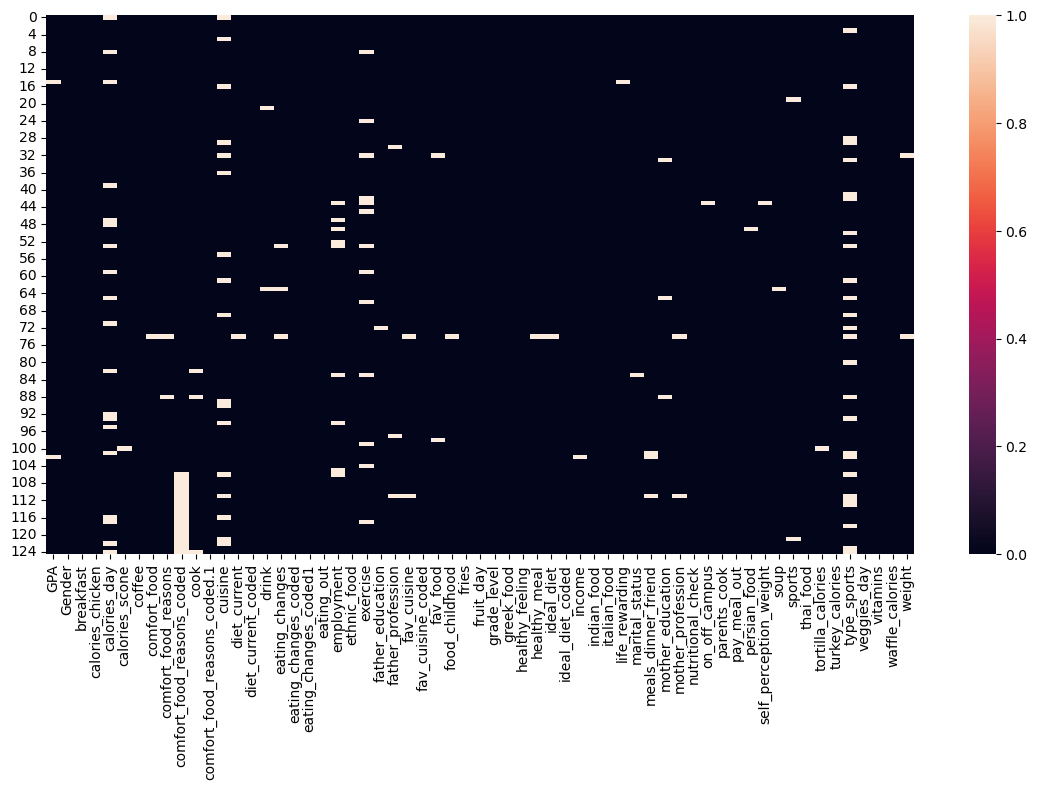

In [260]:
sns.heatmap(df.isnull())

In [261]:
df.bfill(inplace=True)

In [262]:
df.isnull().sum().sum()

23

In [263]:
df.ffill(inplace=True)

In [264]:
df.isnull().sum().sum()

0

In [265]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.0000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.056000,504.560000,1.75200,2.592000,2.784000,2.688000,1.408000,...,2.792000,3.120000,1.2240,1.392000,3.336000,949.320000,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.613083,230.034198,0.43359,1.832045,1.028497,1.910987,1.032504,...,1.427246,1.111523,0.4186,0.490161,1.436528,202.210909,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.0000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.0000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.0000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.0000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [266]:
df["Gender"].unique()

array([2, 1])

In [267]:
df.shape

(125, 61)

# Q.1. How many respondents are employed?Show with Bar Graph.


In [268]:
df["employment"].value_counts()

employment
2.0    63
3.0    60
1.0     2
Name: count, dtype: int64

In [269]:
df["employment"].unique()

array([3., 2., 1.])

In [270]:
mapping = {1: 'Yes, Full Time', 2: 'Yes, Part Time', 3: 'No', }

# Convert the numerical 'employee' column to categorical using map()
df['employee_category'] = df['employment'].map(mapping)

df.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,employee_category
0,2.4,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,1.0,1,1165.0,345,car racing,5,1,1315,187,No
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,2,725.0,690,Basketball,4,2,900,155,"Yes, Part Time"
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.,No
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,2.0,5,725.0,690,Softball,3,1,1315,"Not sure, 240",No
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,4,940.0,500,Softball,4,2,760,190,"Yes, Part Time"


In [271]:
df["Gender"].unique()

array([2, 1])

In [272]:
mapping={1:"Female",2:"Male"}
df["Gender_catagorical"]=df["Gender"].map(mapping)
df.head(2)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,employee_category,Gender_catagorical
0,2.4,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,1,1165.0,345,car racing,5,1,1315,187,No,Male
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,2,725.0,690,Basketball,4,2,900,155,"Yes, Part Time",Female


In [273]:
df["employee_category"].unique()

array(['No', 'Yes, Part Time', 'Yes, Full Time'], dtype=object)

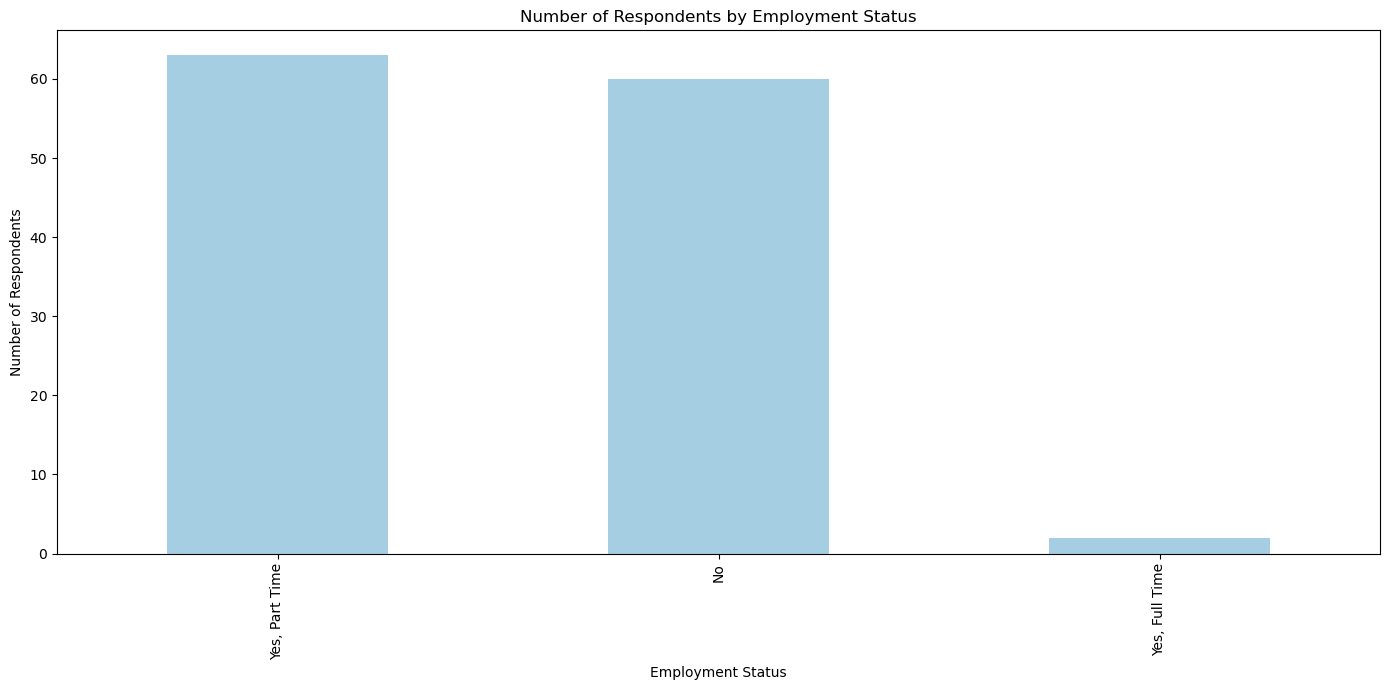

In [274]:

df["employee_category"].value_counts().plot(kind="bar",color=['#a6cee3'])
plt.title('Number of Respondents by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

# Q.2.How is this employment status distributed across different genders?

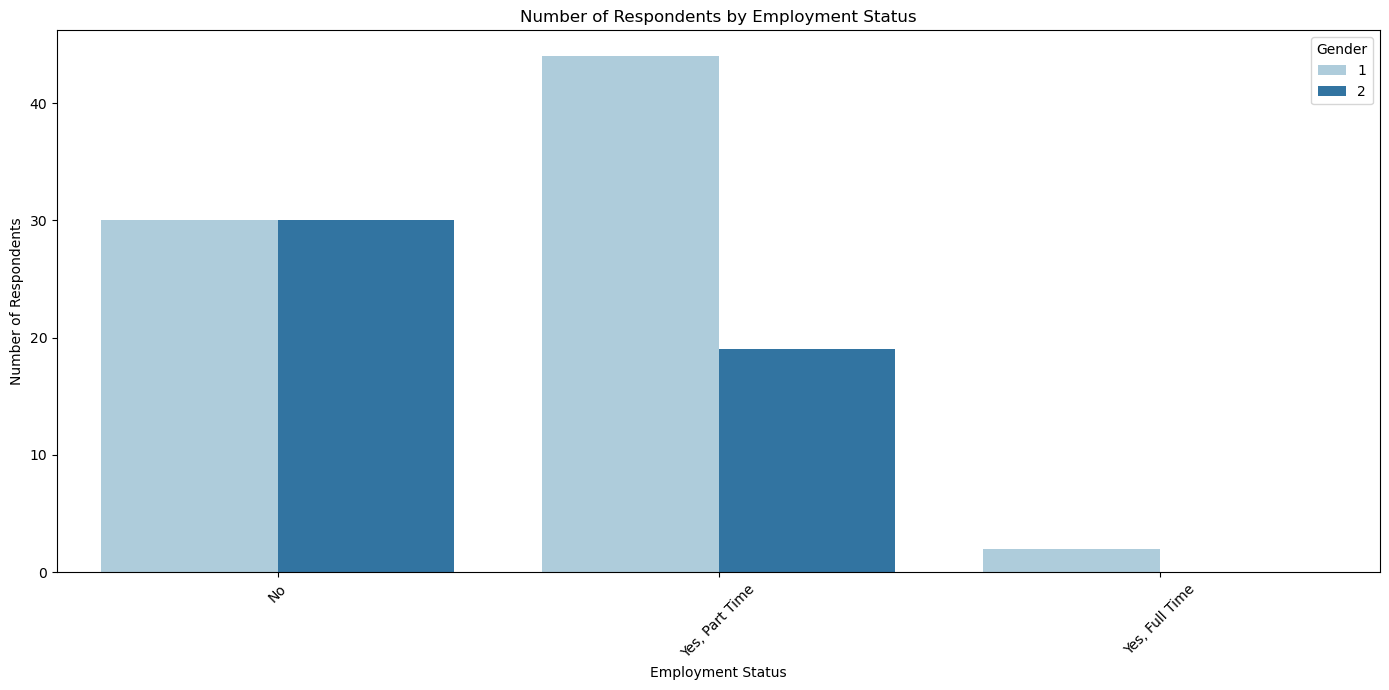

In [275]:
sns.countplot( x='employee_category',data=df,hue='Gender', palette='Paired')
plt.title('Number of Respondents by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Q.3.What is the most common comfort food among those with a GPA above 3.5?

In [276]:
df.head(3)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,employee_category,Gender_catagorical
0,2.4,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,1,1165.0,345,car racing,5,1,1315,187,No,Male
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,2,725.0,690,Basketball,4,2,900,155,"Yes, Part Time",Female
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,5,1165.0,500,none,5,1,900,I'm not answering this.,No,Female


In [277]:
df["comfort_food"]

0                                         none
1                  chocolate, chips, ice cream
2              frozen yogurt, pizza, fast food
3             Pizza, Mac and cheese, ice cream
4                 Ice cream, chocolate, chips 
                        ...                   
120    wine. mac and cheese, pizza, ice cream 
121                 Pizza / Wings / Cheesecake
122                 rice, potato, seaweed soup
123               Mac n Cheese, Lasagna, Pizza
124               Chocolates, pizza, and Ritz.
Name: comfort_food, Length: 125, dtype: object

In [278]:

df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           122 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   comfort_food_reasons_coded    125 non-null    float64
 10  cook                          125 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       125 non-null    float64
 13  diet_

In [279]:
filtered_df=df[df["GPA"] > 3.5]
filtered_df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,employee_category,Gender_catagorical
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,2,725.0,690,Basketball,4,2,900,155,"Yes, Part Time",Female
6,3.800,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,5,940.0,690,soccer,4,1,1315,180,No,Male
11,3.904,1,1,720,4.0,420.0,2,"chocolate, pasta, soup, chips, popcorn","sadness, stress, cold weather",3.0,...,5,940.0,500,Running,5,1,900,110,"Yes, Part Time",Female
13,3.600,1,1,610,3.0,420.0,2,"ice cream, cake, chocolate","stress, boredom, special occasions",1.0,...,5,1165.0,850,intramural volleyball,5,2,1315,123,"Yes, Part Time",Female
15,4.000,2,2,430,3.0,980.0,2,"cookies, donuts, candy bars",boredom,2.0,...,1,940.0,345,Hockey,1,2,1315,180,No,Male
16,4.000,1,1,265,3.0,420.0,1,"Saltfish, Candy and Kit Kat",Stress,1.0,...,1,580.0,345,hockey,5,1,760,145,"Yes, Part Time",Female
17,3.600,2,1,430,3.0,980.0,2,"chips, cookies, ice cream",I usually only eat comfort food when I'm bored...,2.0,...,3,940.0,500,hockey,4,2,900,170,No,Male
21,3.870,2,1,610,3.0,315.0,1,"chocolate, sweets, ice cream",Mostly boredom,2.0,...,5,725.0,500,Tennis,2,2,900,195,"Yes, Part Time",Male
22,3.700,2,1,610,3.0,420.0,1,"burgers, chips, cookies","sadness, depression",3.0,...,4,940.0,850,tennis soccer gym,3,1,1315,185,"Yes, Part Time",Male
23,3.700,2,2,610,3.0,420.0,2,"Chilli, soup, pot pie",Stress and boredom,1.0,...,4,940.0,690,Gaelic Football,4,1,1315,185,"Yes, Part Time",Male


In [280]:

filtered_df = df[df['GPA'] > 3.5]
filtered_df['comfort_food'].value_counts().max()


1

In [281]:

filtered_df = df[df['GPA'] > 3.5]
filtered_df['comfort_food'].value_counts()

comfort_food
chocolate, chips, ice cream                                                                          1
Chocolate, ice cream, french fries, pretzels                                                         1
Broccoli, spaghetti squash, quinoa, and grilled chicken                                              1
Chocolate, ice cream, cookie dough                                                                   1
chocolate, pizza, and mashed potatoes                                                                1
Chips sweets popcorn                                                                                 1
pizza, ice cream, cookies                                                                            1
Mashed potatoes, pasta                                                                               1
Pasta dishes, Cheesecake, Pancakes                                                                   1
chips, ice cream, fruit snacks                              

There are lots of foods which are the most common comfort food among those with a GPA abpve 3.5.

# Q.4.What is the most common type of sport played by respondents?

In [282]:
df["type_sports"].unique()

array(['car racing', 'Basketball ', 'none', 'Softball', 'None.', 'soccer',
       'field hockey', 'Running', 'Soccer and basketball ',
       'intramural volleyball', 'Hockey', 'hockey', 'dancing ',
       'basketball', 'Soccer', 'Tennis', 'tennis soccer gym',
       'Gaelic Football', 'Ice hockey', 'Lacrosse ', 'snowboarding',
       'none organized', 'softball', 'Lacrosse', 'Softball ', 'Dancing',
       'wrestling ', 'no particular engagement ', 'Volleyball', 'soccer ',
       'wrestling & rowing', 'Wrestling', 'Skiing', 'skiing ',
       'Water polo and running ', 'Ice Hockey', 'rowing ', 'tennis  ',
       'Recreational Basketball, Equestrian Team', 'Rec Volleyball',
       'baseball', 'I danced in high school', 'horse back riding',
       'competitive skiing', 'Rowing, Running, and Cycling',
       'softball and basketball', 'wrestling', 'Marching Band',
       'Collegiate Water Polo', 'None right now', 'volleyball, lacrosse',
       'none ', 'Fotball', 'crew',
       'Football, 

In [283]:
df["type_sports"].value_counts()

type_sports
none                                        10
Hockey                                       8
softball                                     5
Soccer                                       5
Tennis, Basketball                           4
                                            ..
Skiing                                       1
Water polo and running                       1
rowing                                       1
Recreational Basketball, Equestrian Team     1
basketball                                   1
Name: count, Length: 66, dtype: int64

In [284]:
df["type_sports"].value_counts().max()

10

<AxesSubplot: xlabel='type_sports', ylabel='count'>

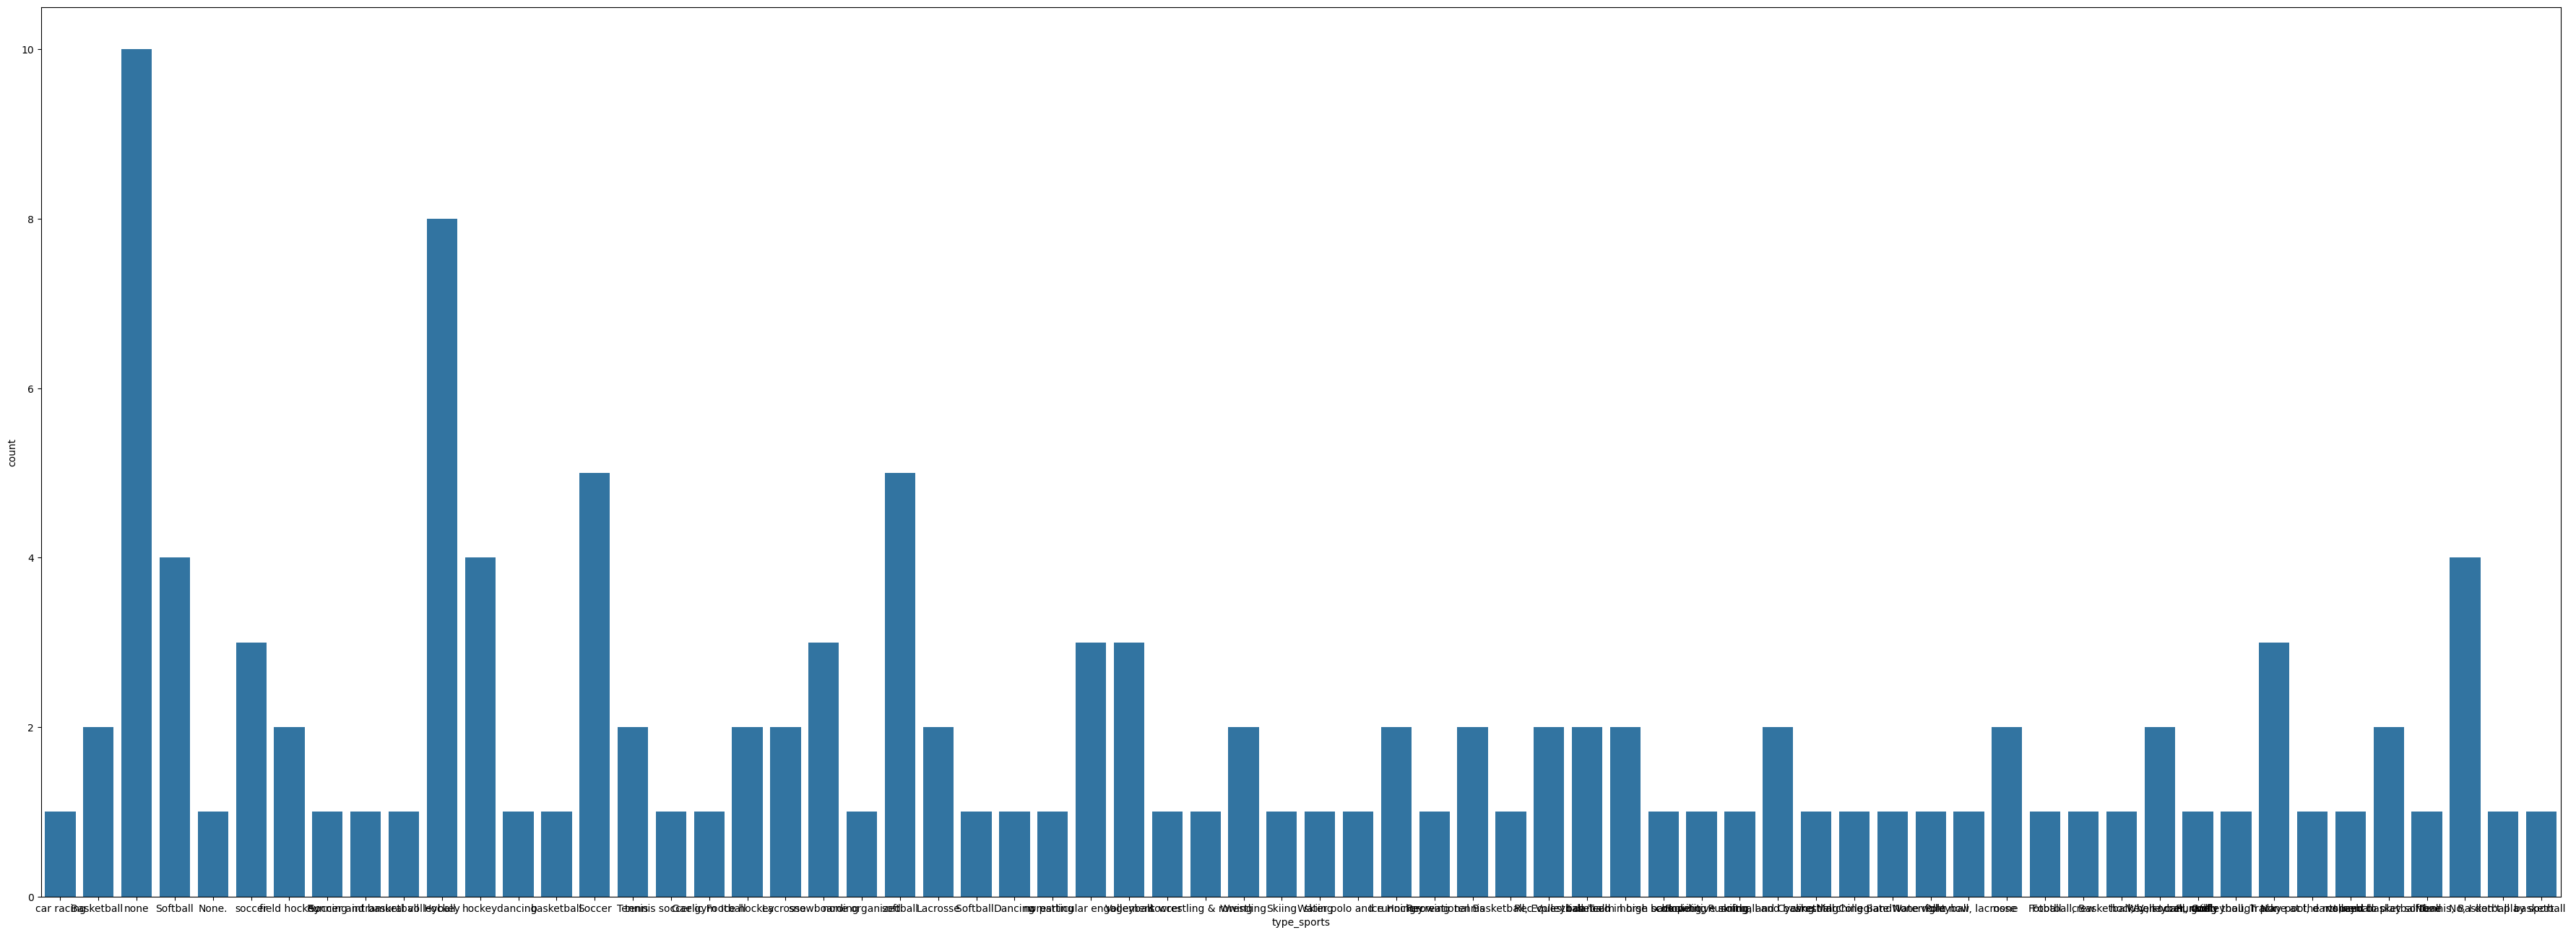

In [285]:
plt.figure(figsize=(45, 16))
sns.countplot(x="type_sports",data=df)


Most common type of sport playef by the respondents is Hockey.

# Q.5.What is the average number of calories consumed by respondents for chicken?


In [286]:
df.head(2)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,employee_category,Gender_catagorical
0,2.400,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,1,1165.0,345,car racing,5,1,1315,187,No,Male
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,2,725.0,690,Basketball,4,2,900,155,"Yes, Part Time",Female


In [287]:
df["calories_chicken"].mean()

577.32

The average calories consumed is approximately 577 calories.

# Q.6.What is the most popular cuisine among respondents? Show with grath.

In [288]:
df["fav_cuisine"].value_counts()#nunique()

fav_cuisine
Italian                                     22
Italian                                     20
italian                                      6
Mexican                                      5
Mexican                                      4
American                                     3
American                                     3
italian                                      3
Chinese                                      3
Chinese                                      2
Indian                                       2
Asian                                        2
Korean                                       2
Thai                                         2
Japanese                                     1
Authentic Chinese and Vietnamese food        1
Mexican cuisine                              1
american                                     1
Lean                                         1
Asian                                        1
Chinese food                                 1
m

Italian Cuisine is the most popular cusine amoneg the repondents

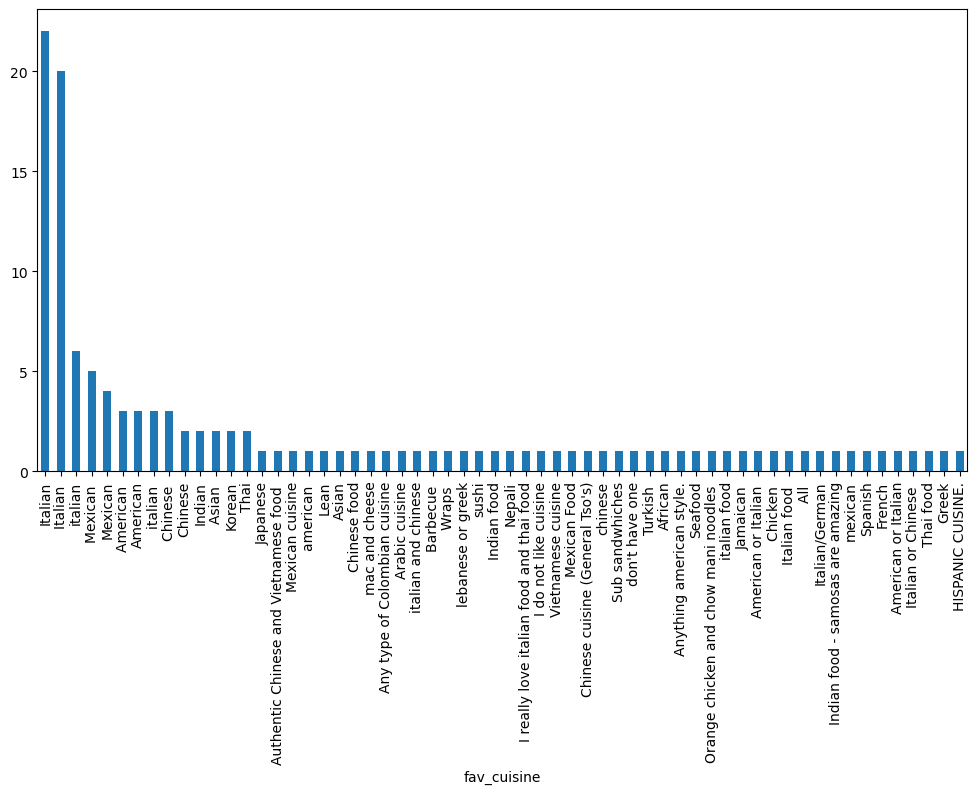

In [289]:
plt.figure(figsize=(12,6))
df["fav_cuisine"].value_counts().plot(kind="bar")
plt.show()

# Q.7.What is the average number of veggies eaten per day?

In [290]:
df["veggies_day"].mean()

4.008

The average number of veggies eaten per day is  around 4.


# Q.8.What is the most popular comfort food among males vs. females?

In [291]:
df.head(2)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,employee_category,Gender_catagorical
0,2.400,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,1,1165.0,345,car racing,5,1,1315,187,No,Male
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,2,725.0,690,Basketball,4,2,900,155,"Yes, Part Time",Female


In [292]:
mapping = {1: 'Female', 2: 'Male'}
df['new_gender'] = df['Gender'].map(mapping)
df.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,employee_category,Gender_catagorical,new_gender
0,2.400,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,1165.0,345,car racing,5,1,1315,187,No,Male,Male
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,725.0,690,Basketball,4,2,900,155,"Yes, Part Time",Female,Female
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1165.0,500,none,5,1,900,I'm not answering this.,No,Female,Female
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,725.0,690,Softball,3,1,1315,"Not sure, 240",No,Female,Female
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,940.0,500,Softball,4,2,760,190,"Yes, Part Time",Female,Female


In [293]:
df['new_gender'].unique()

array(['Male', 'Female'], dtype=object)

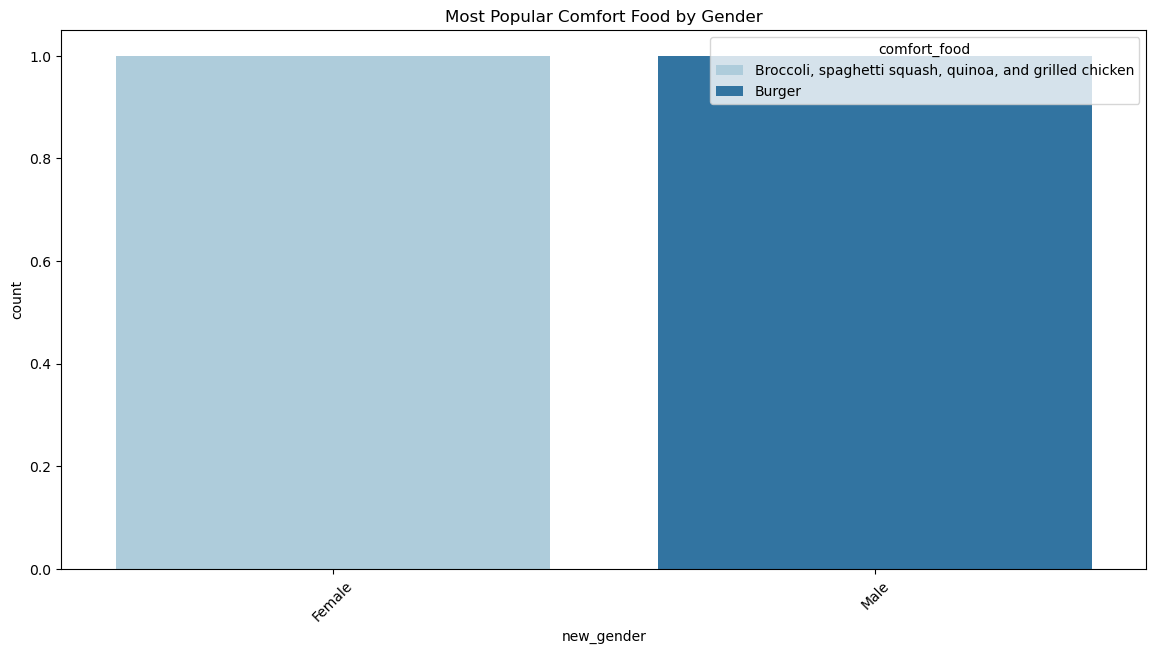

In [294]:
comfort_food_counts = df.groupby(['new_gender', 'comfort_food']).size().reset_index(name='count')
most_popular_comfort_food = comfort_food_counts.loc[comfort_food_counts.groupby('new_gender')['count'].idxmax()]
sns.barplot(x='new_gender', y='count', hue='comfort_food', data=most_popular_comfort_food,palette='Paired')
plt.title('Most Popular Comfort Food by Gender')
plt.xticks(rotation=45)
plt.show()


# Q.9.What is the most common type of diet followed by respondents?

In [295]:
df["diet_current"].value_counts()

diet_current
I normally eat a salad every day. I try to get at least every food group into my diet                                               2
eat good and exercise                                                                                                               1
No diet. I eat what makes me feel good                                                                                              1
My diet consists of high levels of meats with some vegetables. Coexisting with varying levels of sugars                             1
I eat very basic foods like pizza and pasta. I don't try many new things.                                                           1
                                                                                                                                   ..
I eat out more often then not. I try to make sure when I eat out it isn't fast food, but instead something healthy like Panera.     1
A lot of rice and veggies, eggs for breakfast, ch

For dittinf respondents eat good and exercise.

# Q.10.Do respondents who eat more fruit also eat more vegetables?

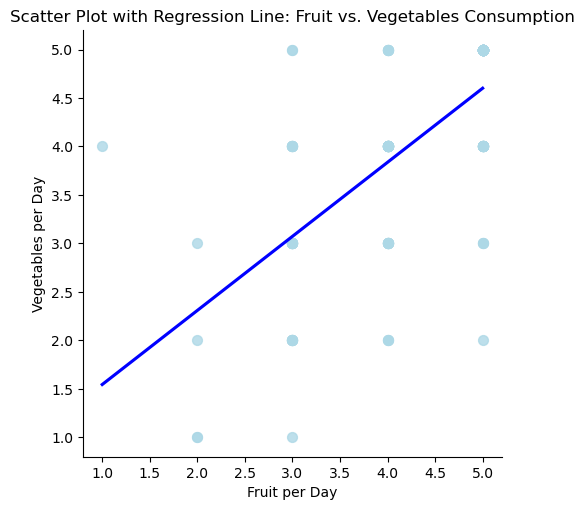

In [296]:
# Calculate the correlation between fruit_day and veggies_day
correlation = df['fruit_day'].corr(df['veggies_day'])


# Create a scatter plot with a regression line
sns.lmplot(x='fruit_day', y='veggies_day', data=df, ci=None, scatter_kws={"s": 50, "color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel('Fruit per Day')
plt.ylabel('Vegetables per Day')
plt.title('Scatter Plot with Regression Line: Fruit vs. Vegetables Consumption')
plt.show()


If the correlation coefficient is positive and close to 1, it suggests that respondents who eat more fruit also tend to eat more vegetables. A scatter plot with an upward-sloping regression line would visually confirm this relationship.


Or another plot

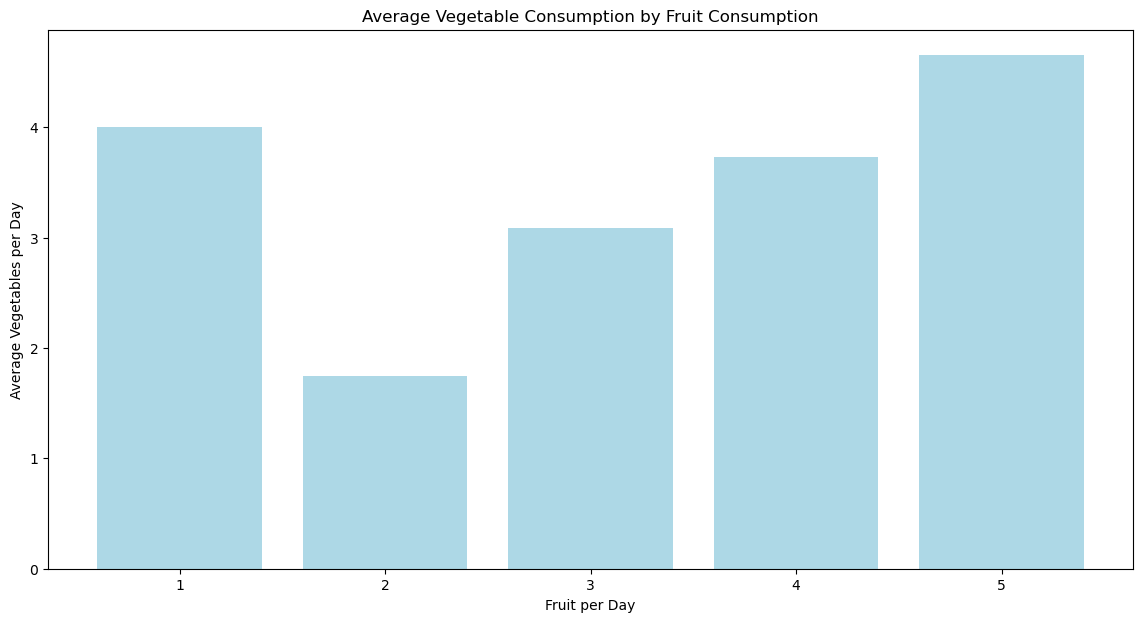

In [297]:
# Group by fruit_day and calculate the mean of veggies_day
grouped_data = df.groupby('fruit_day')['veggies_day'].mean().reset_index()

# Bar Plot
plt.bar(grouped_data['fruit_day'], grouped_data['veggies_day'], color='lightblue')
plt.xlabel('Fruit per Day')
plt.ylabel('Average Vegetables per Day')
plt.title('Average Vegetable Consumption by Fruit Consumption')
plt.xticks(grouped_data['fruit_day'])
plt.show()

# Calculating the correlation between fruit_day and veggies_day
correlation = df['fruit_day'].corr(df['veggies_day'])


# 11.How many respondents take vitamins regularly?

In [298]:
df.head(2)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,employee_category,Gender_catagorical,new_gender
0,2.400,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,1165.0,345,car racing,5,1,1315,187,No,Male,Male
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,725.0,690,Basketball,4,2,900,155,"Yes, Part Time",Female,Female


In [299]:
mapping = {1: 'Yes', 2: 'No'}
df['new_vitamins'] = df['vitamins'].map(mapping)
df.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,employee_category,Gender_catagorical,new_gender,new_vitamins
0,2.400,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,345,car racing,5,1,1315,187,No,Male,Male,Yes
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,690,Basketball,4,2,900,155,"Yes, Part Time",Female,Female,No
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,500,none,5,1,900,I'm not answering this.,No,Female,Female,Yes
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,690,Softball,3,1,1315,"Not sure, 240",No,Female,Female,Yes
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,500,Softball,4,2,760,190,"Yes, Part Time",Female,Female,No


In [300]:
df["new_vitamins"].unique()

array(['Yes', 'No'], dtype=object)

In [301]:
df["new_vitamins"].value_counts()

new_vitamins
No     64
Yes    61
Name: count, dtype: int64

Total 61 respondents take vitamins regularly.

# Q.12.Is there any correlation between GPA and daily calorie intake??

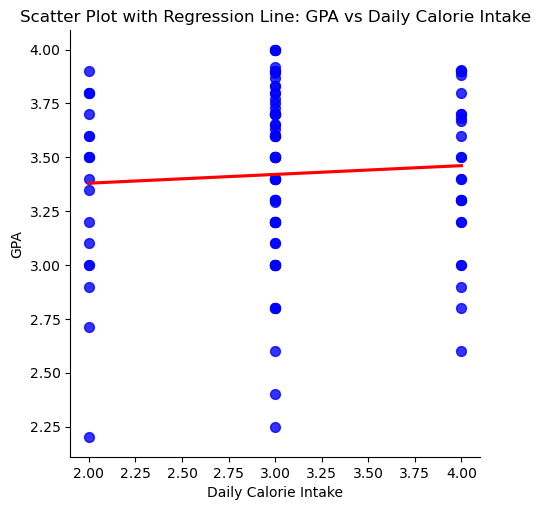

In [302]:
# Calculate the correlation between GPA and daily_calories
correlation = df['GPA'].corr(df['calories_day'])


# Create a scatter plot with a regression line
sns.lmplot(x='calories_day', y='GPA', data=df, ci=None, scatter_kws={"s": 50, "color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Daily Calorie Intake')
plt.ylabel('GPA')
plt.title('Scatter Plot with Regression Line: GPA vs Daily Calorie Intake')
plt.show()


The correlation coefficient will indicate whether there is a linear relationship between GPA and daily calorie intake. A positive value suggests that as daily calorie intake increases, GPA tends to increase, while a negative value suggests the opposite. The scatter plot with the regression line will help you visually assess this relationship.

# Q.13. Show the Mearital Status by Bar plot.

In [306]:
df["marital_status"].unique()

array([1., 2., 4.])

In [307]:
mapping = {1: 'Single', 2: 'In a relationship',4:'Married'}
df['new_marital_status'] = df['marital_status'].map(mapping)
df.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,type_sports,veggies_day,vitamins,waffle_calories,weight,employee_category,Gender_catagorical,new_gender,new_vitamins,new_marital_status
0,2.400,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,car racing,5,1,1315,187,No,Male,Male,Yes,Single
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,Basketball,4,2,900,155,"Yes, Part Time",Female,Female,No,In a relationship
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,none,5,1,900,I'm not answering this.,No,Female,Female,Yes,In a relationship
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,Softball,3,1,1315,"Not sure, 240",No,Female,Female,Yes,In a relationship
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,Softball,4,2,760,190,"Yes, Part Time",Female,Female,No,Single


In [309]:
df['new_marital_status'].value_counts()

new_marital_status
Single               64
In a relationship    60
Married               1
Name: count, dtype: int64

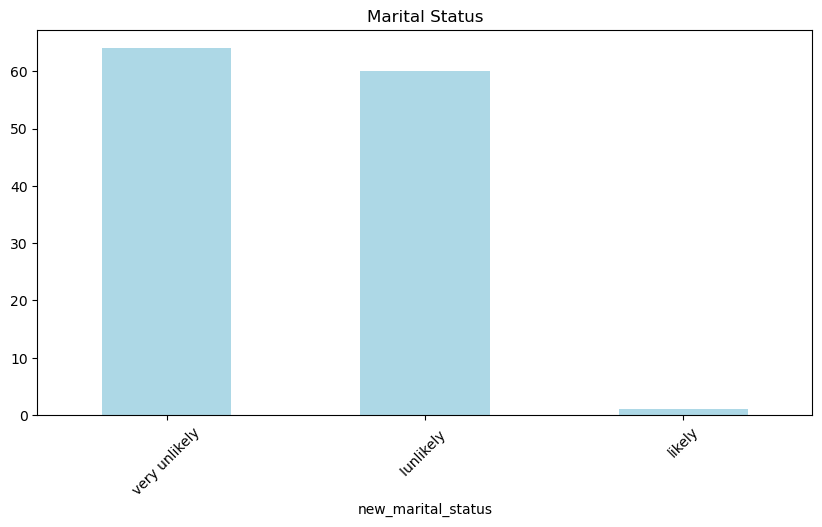

In [322]:
df['new_marital_status'].value_counts().plot(kind="bar",color="lightblue")
plt.title('Marital Status')
plt.xticks(rotation=45)
plt.show()


In [318]:
df["ethnic_food"].unique()

array([1, 4, 5, 2, 3])

Q.14.How likely to eat ethnic food ?

In [320]:
mapping = {1: 'very unlikely', 2: 'Iunlikely ',3:'neutral',4:'likely',5:'very likely'}
df['new_ethnic_food'] = df['marital_status'].map(mapping)
df.head(2)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,veggies_day,vitamins,waffle_calories,weight,employee_category,Gender_catagorical,new_gender,new_vitamins,new_marital_status,new_ethnic_food
0,2.400,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,5,1,1315,187,No,Male,Male,Yes,very unlikely,very unlikely
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,4,2,900,155,"Yes, Part Time",Female,Female,No,Iunlikely,Iunlikely


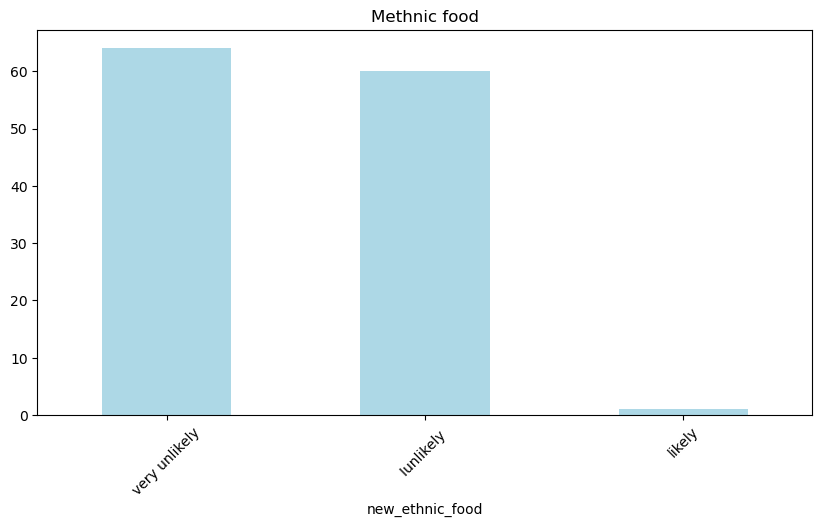

In [324]:
df['new_ethnic_food'].value_counts().plot(kind="bar",color="lightblue")
plt.title('Methnic food')
plt.xticks(rotation=45)
plt.show()

# Q.15.Which soup the respondents eat most which GPA above 3.5 ?

In [331]:
df["soup"].unique()

array([1., 2.])

In [338]:
mapping = {1: 'veggie soup', 2: 'creamy soup'}
df['new_soup'] = df['soup'].map(mapping)
df.head(2)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,vitamins,waffle_calories,weight,employee_category,Gender_catagorical,new_gender,new_vitamins,new_marital_status,new_ethnic_food,new_soup
0,2.400,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,1,1315,187,No,Male,Male,Yes,very unlikely,very unlikely,veggie soup
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,2,900,155,"Yes, Part Time",Female,Female,No,Iunlikely,Iunlikely,veggie soup


In [340]:
df["new_soup"].value_counts()

new_soup
veggie soup    97
creamy soup    28
Name: count, dtype: int64

In [342]:
eat = df[df['GPA'] > 3.5]
eat['new_soup'].value_counts()

new_soup
veggie soup    40
creamy soup    12
Name: count, dtype: int64

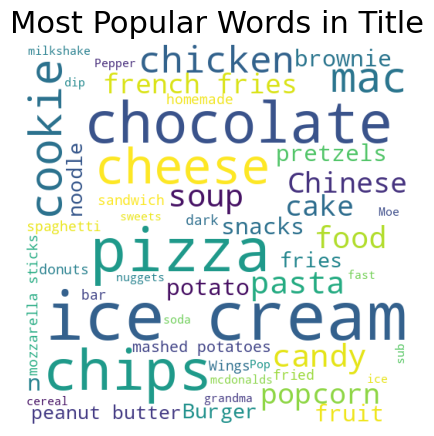

In [343]:
#Wordcloude
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (10, 5)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 500,  height = 500, max_words = 50).generate(' '.join(df['comfort_food']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 22)
plt.show()